# Bike Rental Prediction

## Details of Dataset

The objective of the project is - using historical usage patterns and weather data, forecast(predict) bike rental demand (number of bike users (‘cnt’)) on hourly basis.

Use the provided “Bikes Rental” data set to predict the bike demand (bike users count - 'cnt') using various best possible models (ML algorithms). Also, report the model that performs best, fine-tune the same model using one of the model fine-tuning techniques, and report the best possible combination of hyperparameters for the selected model. Lastly, use the selected model to make final predictions and compare the predicted values with the actual values.

Details:

instant: record index

dteday : date

season: season (1: springer, 2: summer, 3: fall, 4: winter)

yr: year (0: 2011, 1:2012)

mnth: month (1 to 12)

hr: hour (0 to 23)

holiday: whether the day is a holiday or not

weekday: day of the week

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weathersit:

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: Normalized temperature in Celsius. The values are derived via (tt_min)/(t_maxt_min), t_min=*8, t_max=+39 (only in hourly scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via (tt_min)/(t_maxt_min), t_min=*16, t_max=+50 (only in hourly scale)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered users


The "target" data set ('y') should have only one 'label' i.e. 'cnt'.

#  Importing required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import os
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


# Importing dataset and cleaning it

In [2]:
df=pd.read_csv(r"C:\Users\slowd\OneDrive\Desktop\Projects\ML projects\Bike_Rentals\Data\hour.csv")

In [3]:
df[df["instant"] == 25]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
24,25,2011-01-02,1,0,1,0,0,0,0,2,0.46,0.4545,0.88,0.2985,4,13,17


In [4]:
print(df["yr"].unique())

[0 1]


In [5]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Dropping irrelevant columns

In [6]:
columns_to_drop = ["instant", "casual", "registered", "atemp", "dteday"]
df=df.drop(columns=columns_to_drop, axis=1)

### Adding a dayCount column to show exact time during each day in dataframe

In [7]:
df['dayCount'] = pd.Series(range(df.shape[0]))/24

In [8]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16,0.000000
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40,0.041667
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32,0.083333
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13,0.125000
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1,0.166667


## Creating training and testing dataset by splitting the original dataset in ratio 70:30

In [9]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

In [10]:
print(len(train_set), "train +", len(test_set), "test")

12165 train + 5214 test


In [11]:
train_set.sort_values('dayCount', axis= 0, inplace=True)
test_set.sort_values('dayCount', axis= 0, inplace=True)

In [12]:
train_set.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,2.510399,0.501767,6.562351,11.579038,0.027949,3.004603,0.681381,1.426634,0.498058,0.627472,0.189457,191.237649,362.552038
std,1.105498,0.500017,3.430356,6.925790,0.164834,2.010245,0.465960,0.639961,0.193085,0.193316,0.122025,182.900931,209.592847
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,1.000000,0.041667
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.480000,0.104500,40.000000,181.333333
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.630000,0.164200,145.000000,361.791667
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.790000,0.253700,282.000000,545.333333
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,0.850700,976.000000,724.083333


### Applying Scaling

Some columns are measured in varying scales so we have to transform so that the various ML models work fine on them.

In [13]:
columns_to_scale=["temp","hum", "windspeed"]

Applies the forumla:
(x - mean)/standard_deviation


In [14]:
scaler = StandardScaler()
train_set[columns_to_scale] = scaler.fit_transform(train_set[columns_to_scale])
test_set[columns_to_scale] = scaler.transform(test_set[columns_to_scale])
train_set[columns_to_scale].describe()

,temp,hum,windspeed
count,1.216500e+04,1.216500e+04,1.216500e+04
mean,-1.869081e-17,2.371396e-16,1.401811e-16
std,1.000041e+00,1.000041e+00,1.000041e+00
min,-2.476000e+00,-3.245965e+00,-1.552670e+00
25%,-8.186290e-01,-7.628859e-01,-6.962541e-01
50%,1.005628e-02,1.307622e-02,-2.069907e-01
75%,8.387416e-01,8.407692e-01,5.264946e-01
max,2.599698e+00,1.927116e+00,5.419128e+00


# Training dataset

## Splitting into training columns and labels

In [15]:
trainingCols = train_set.drop(['cnt'], axis=1)
trainingLabels = train_set['cnt']

In [16]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

## We get the Mean Absoulute Error (MAE) and Mean Squared Error (MSE) for various training models

### Decision Tree

In [17]:
dec_reg = DecisionTreeRegressor(random_state = 42)

In [18]:
dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(dt_mae_scores)

Scores: [42.94494659 50.37222679 36.95891537 44.26211997 46.99589154 71.98026316
 58.19901316 48.87417763 50.84868421 96.46217105]
Mean: 54.7898409457034
Standard deviation: 16.563759407187572


In [19]:
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(dt_mse_scores)

Scores: [ 65.39786583  77.67402864  60.57274567  73.73250527  75.48574011
 113.22922285  96.5884429   82.11639785  86.86752618 149.13680359]
Mean: 88.0801278896052
Standard deviation: 24.927341207369675


### Linear Regression

In [20]:
lin_reg = LinearRegression()

In [21]:
lr_mae_scores = -cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(lr_mae_scores)

Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.432412569423
Standard deviation: 31.426965705294794


In [22]:
lr_mse_scores=np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(lr_mse_scores)

Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.19022901181813
Standard deviation: 37.555650759195224


### Random Forest Regression

In [23]:
rf_reg=RandomForestRegressor()

In [24]:
rfr_mae_scores=-cross_val_score(rf_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(rfr_mae_scores)

Scores: [33.3863599  32.62563681 29.03667214 31.68005752 36.36364832 58.12479441
 40.82787829 41.53359375 37.69944079 84.45818257]
Mean: 42.573626449449684
Standard deviation: 15.962120865411569


In [25]:
rfr_mse_score=np.sqrt(-cross_val_score(rf_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(rfr_mse_score)

Scores: [ 47.57071655  52.28361121  44.20071664  52.3497312   60.71999839
  94.09382903  66.51736101  66.02795389  60.68548962 134.79396817]
Mean: 67.92433756953
Standard deviation: 25.94330321988309


We see that the random forest regression yields the best results hence that will be the model we will be working with

# Fine tuning the model

We use grid search to get the best parameters for the most optimal results

In [26]:
param_grid = [
    {'n_estimators': [120, 150], 'max_features': [10, 12], 'max_depth': [15, 28]},
]

In [27]:
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

In [28]:
grid_search.fit(trainingCols, trainingLabels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [15, 28], 'max_features': [10, 12],
                          'n_estimators': [120, 150]}],
             scoring='neg_mean_squared_error')

In [29]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=28, max_features=10, n_estimators=120)


In [30]:
print(grid_search.best_params_)

{'max_depth': 28, 'max_features': 10, 'n_estimators': 120}


In [31]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[0.00506077 0.00463056 0.00573747 0.57641289 0.00205046 0.01775569
 0.0729443  0.016771   0.09549576 0.03463266 0.00944615 0.15906227]


# Final Model

In [32]:
final_model = grid_search.best_estimator_
test_set.sort_values('dayCount', axis= 0, inplace=True)
test_x_cols = (test_set.drop(['cnt'], axis=1)).columns.values
test_y_cols = 'cnt'

X_test = test_set.loc[:,test_x_cols]
y_test = test_set.loc[:,test_y_cols]

In [33]:
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)

mse = mean_squared_error(y_test, test_set.loc[:,'predictedCounts_test'])
final_mse = np.sqrt(mse)
print(final_mse)

39.27952295519045


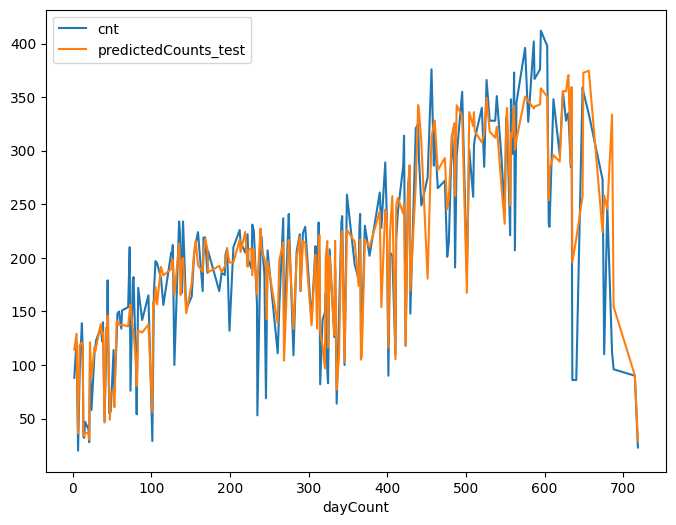

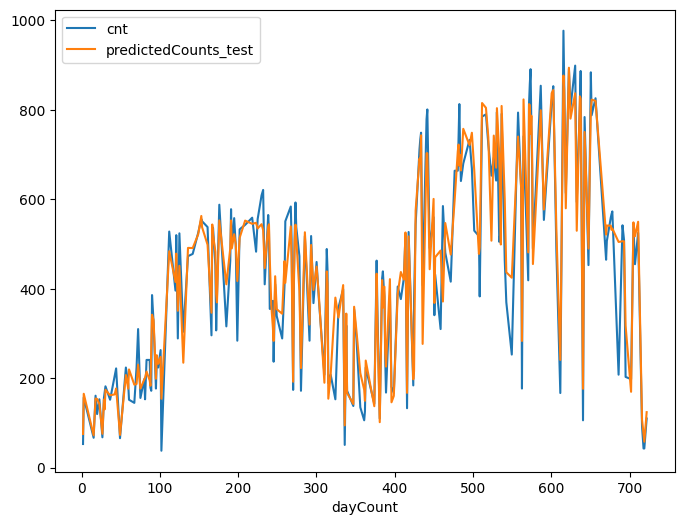

In [34]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()

# Result

Here we are able to see that we are able to see the accuracy of our prediction model at spefic times that are 9 A.M and 6 P.M over all the days.